<a href="https://colab.research.google.com/github/marcosjsh/fiap_tech_challenge/blob/main/fiap_tech_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('insurance.csv')

In [2]:
df.shape

(1338, 7)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [7]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

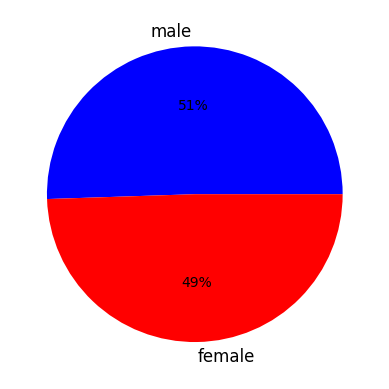

In [10]:
sex_categories = ['male', 'female']
plt.pie(df['sex'].value_counts(), labels = sex_categories, autopct = "%.0f%%", explode=(0, 0), colors = ("b", "r"))
plt.show()

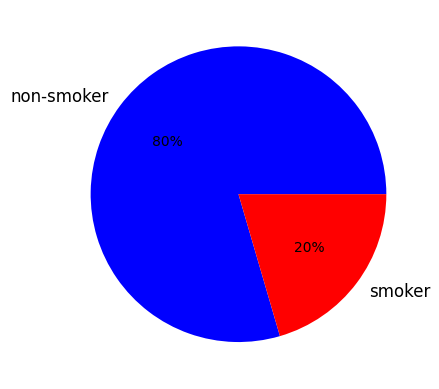

In [11]:
smoker_categories = ['non-smoker', 'smoker']
plt.pie(df['smoker'].value_counts(), labels = smoker_categories, autopct = "%.0f%%", explode=(0, 0), colors = ("b", "r"))
plt.show()

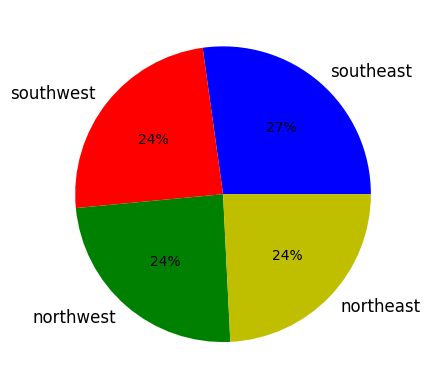

In [12]:
region_categories = ['southeast', 'southwest', 'northwest', 'northeast']
plt.pie(df['region'].value_counts(), labels = region_categories, autopct = "%.0f%%", explode=(0, 0, 0, 0), colors = ("b", "r", "g", "y"))
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

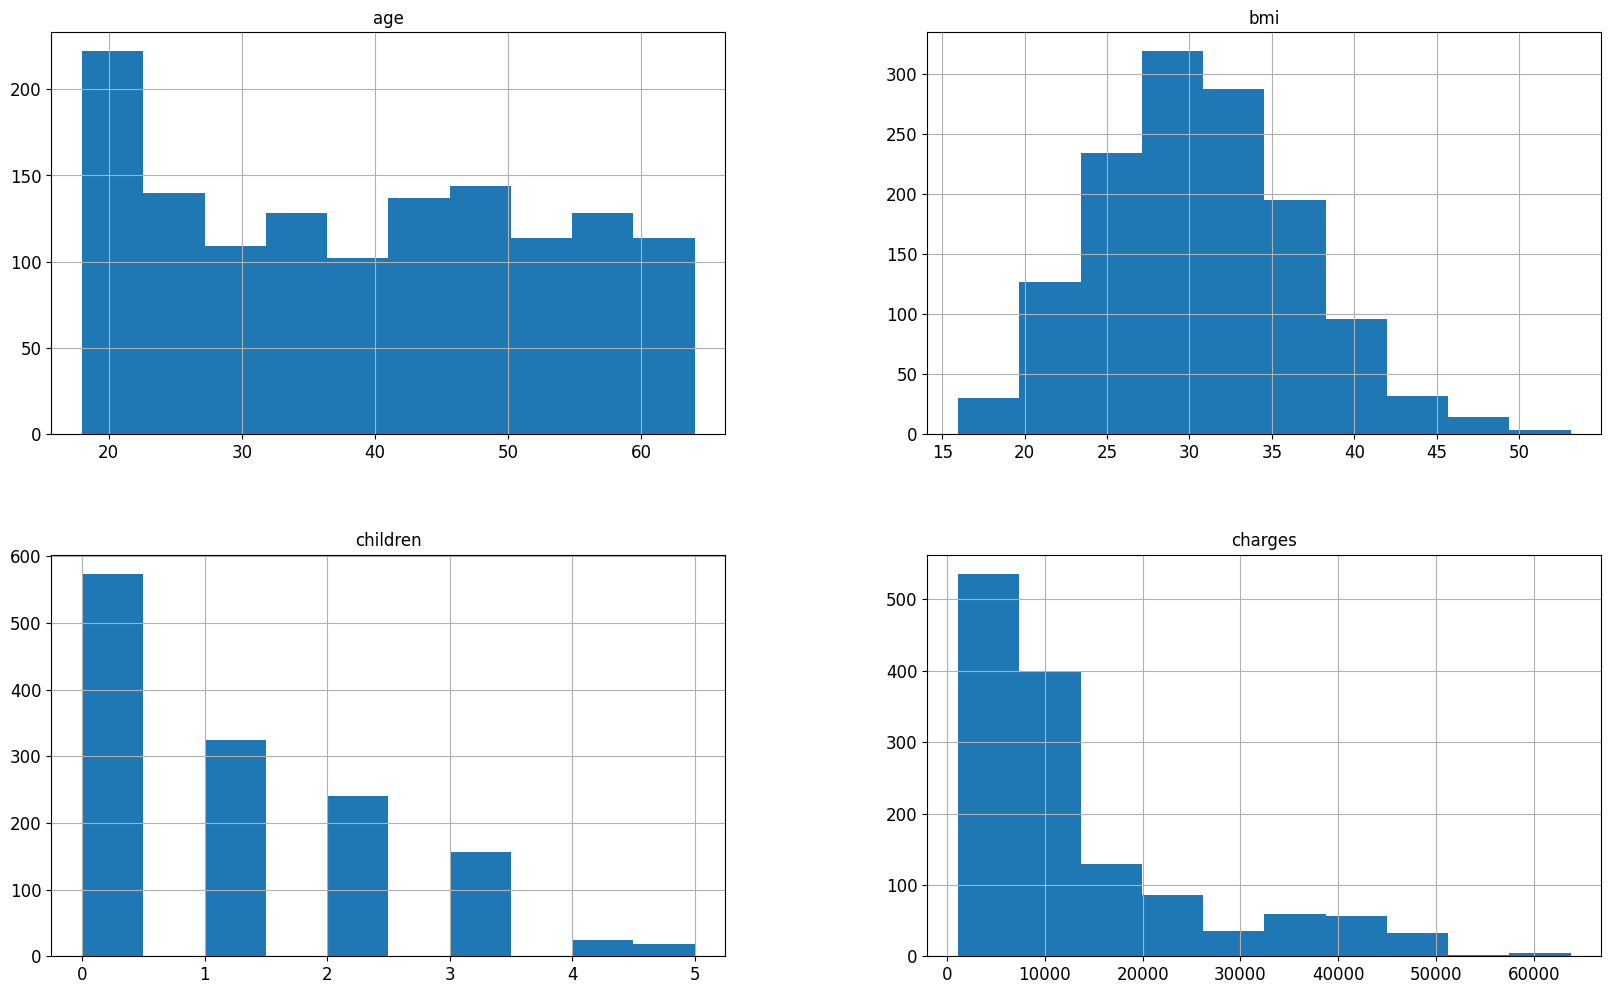

In [13]:
df.hist(bins=10, figsize=(20,12))

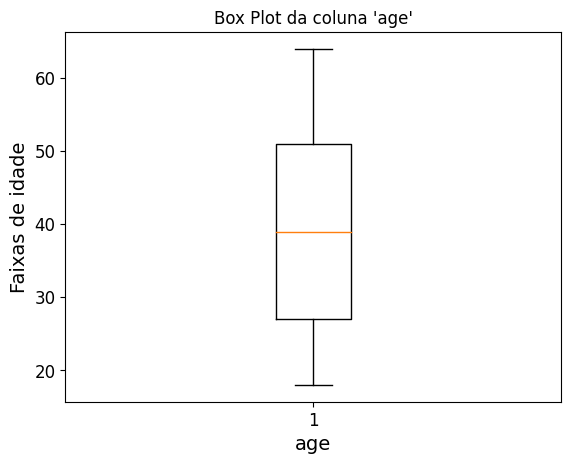

In [14]:
plt.boxplot(df['age'])
plt.xlabel('age')
plt.ylabel('Faixas de idade')
plt.title(f'Box Plot da coluna \'age\'')
plt.show()

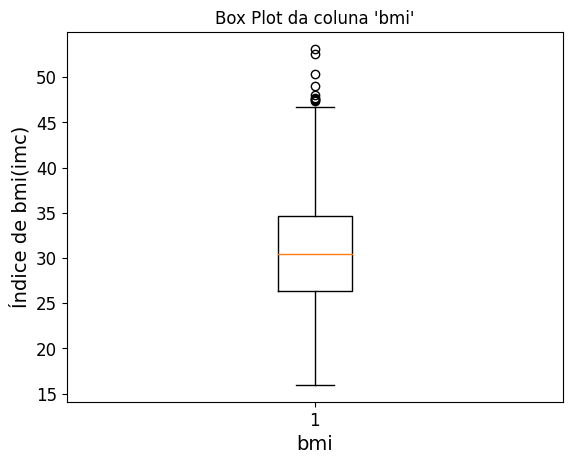

In [15]:
plt.boxplot(df['bmi'])
plt.xlabel('bmi')
plt.ylabel('Índice de bmi(imc)')
plt.title(f'Box Plot da coluna \'bmi\'')
plt.show()

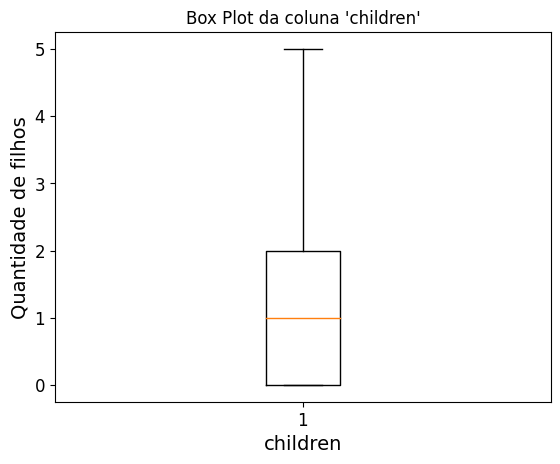

In [16]:
plt.boxplot(df['children'])
plt.xlabel('children')
plt.ylabel('Quantidade de filhos')
plt.title(f'Box Plot da coluna \'children\'')
plt.show()

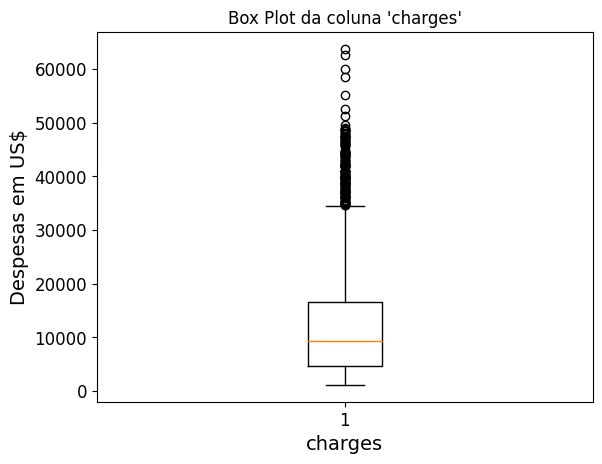

In [17]:
plt.boxplot(df['charges'])
plt.xlabel('charges')
plt.ylabel('Despesas em US$')
plt.title(f'Box Plot da coluna \'charges\'')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [34]:
import seaborn as sns

In [35]:
corr_matrix = df.corr()

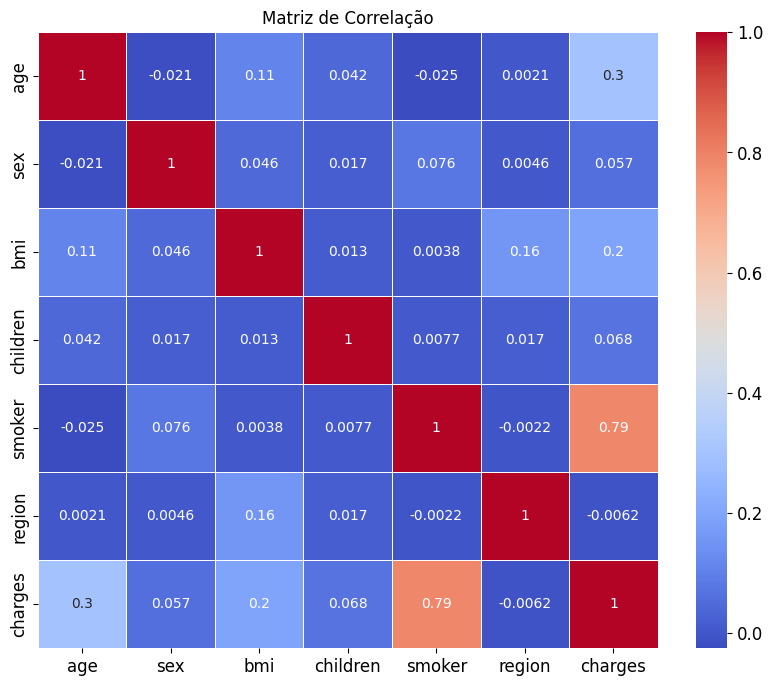

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [38]:
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

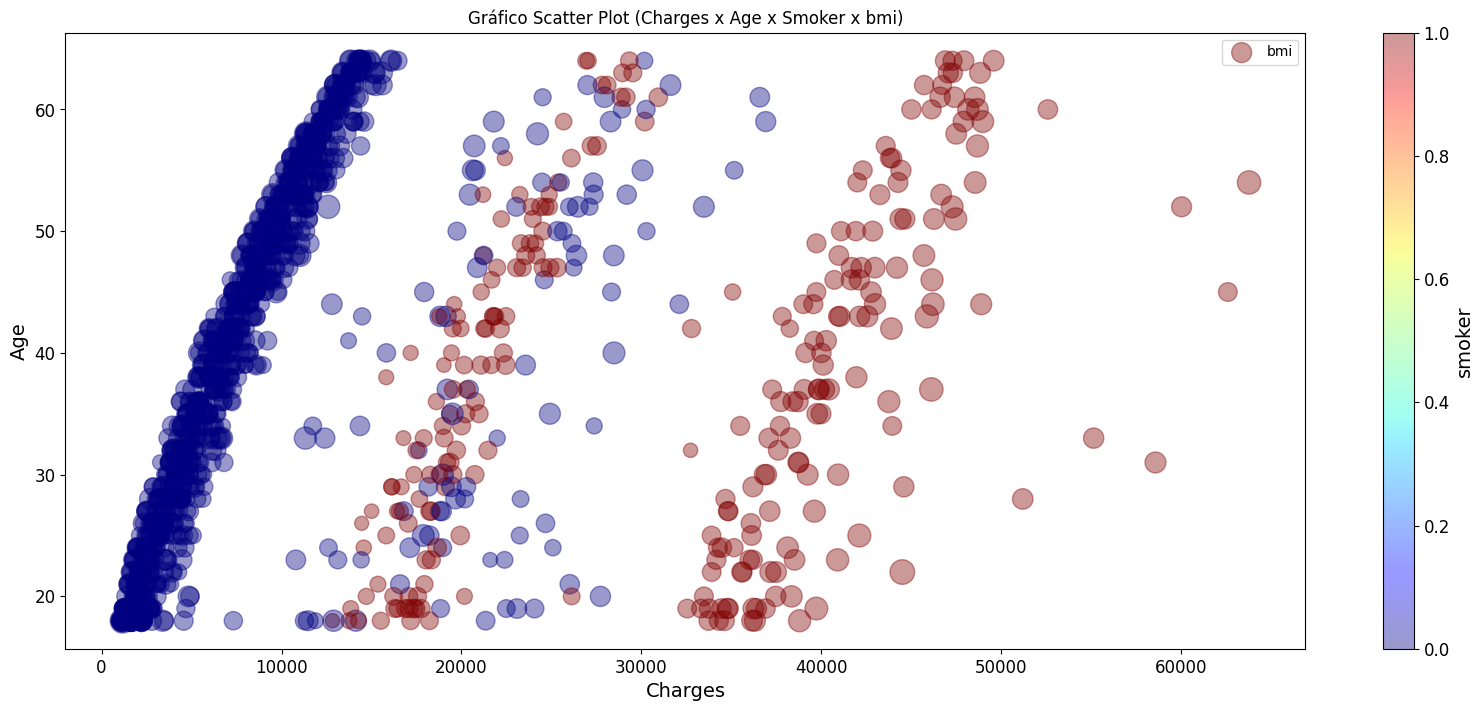

In [40]:
df.plot(
    kind='scatter',
    x='charges',
    y='age',
    alpha=0.4,
    s=df['bmi']*6,
    label='bmi',
    figsize=(20,8),
    c="smoker",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False)

plt.xlabel('Charges')
plt.ylabel('Age')
plt.title('Gráfico Scatter Plot (Charges x Age x Smoker x bmi)')
plt.show()

In [42]:
missing_data = df.isnull().sum()
print(missing_data)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
x = df.drop(columns=['charges'])
y = df['charges']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [53]:
y_pred = lin_reg_model.predict(x_test)

print(list(y_pred))

[8924.407244424494, 7116.2950175763635, 36909.013521437286, 9507.874691179592, 27013.350007896268, 10790.7795615286, 226.29844570864952, 16942.7159994116, 1056.630794073024, 11267.919973091217, 28048.59793154583, 9424.36324087222, 5326.322320880679, 38460.06017921533, 40303.405970256375, 37147.010102616034, 15287.918766838075, 35965.05485916503, 9179.175306704436, 31510.83198490456, 3797.7906836478724, 10070.82803303941, 2312.575513479951, 7074.413481944475, 11352.372243567754, 12907.770795230981, 14448.846787273373, 6205.659979213326, 9917.008396380284, 2239.5003281871504, 9060.554690429593, 13120.562145353904, 4617.7070282226105, 3467.912189255543, 4402.7482185460685, 12967.916089067132, 1927.4449894432073, 8757.9180081006, 33324.351805967795, 32638.47697025563, 3852.4175661537593, 4370.396708831087, 14080.760232344708, 11478.634025764752, 8829.261359237627, 12046.151191325893, 5322.80515730566, 3100.7118248386196, 35546.605475738084, 9201.611968173898, 15894.237633409995, 2406.04003

In [54]:
print(list(y_test))

[9095.06825, 5272.1758, 29330.98315, 9301.89355, 33750.2918, 4536.259, 2117.33885, 14210.53595, 3732.6251, 10264.4421, 18259.216, 7256.7231, 3947.4131, 46151.1245, 48673.5588, 44202.6536, 9800.8882, 42969.8527, 8233.0975, 21774.32215, 5080.096, 7441.501, 1256.299, 2755.02095, 11085.5868, 10923.9332, 12644.589, 18804.7524, 9715.841, 1131.5066, 15828.82173, 11842.62375, 2020.5523, 5693.4305, 2904.088, 7448.40395, 2597.779, 7337.748, 23887.6627, 38709.176, 4687.797, 2643.2685, 11674.13, 12124.9924, 4889.9995, 12333.828, 3579.8287, 4391.652, 42124.5153, 4463.2051, 13887.204, 1719.4363, 28476.73499, 1708.92575, 10594.2257, 25333.33284, 3645.0894, 38746.3551, 11848.141, 10564.8845, 13880.949, 4753.6368, 27941.28758, 8017.06115, 23045.56616, 4133.64165, 17942.106, 25992.82104, 3594.17085, 1682.597, 6079.6715, 9411.005, 8283.6807, 6338.0756, 7152.6714, 4889.0368, 4846.92015, 11454.0215, 4349.462, 9101.798, 1391.5287, 28101.33305, 5152.134, 38511.6283, 44501.3982, 41097.16175, 4837.5823, 10601.

In [55]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 4186.508898366433


In [56]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 33635210.431178406


In [57]:
root_mse = mse ** 0.5
print(f"RMSE: {root_mse}")

RMSE: 5799.587091438356


In [58]:
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: 0.7833463107364539


In [86]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [87]:
mape = mean_absolute_percentage_error(y_test, y_pred);
print(mape)

47.09302952729556


In [64]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 10)}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

best_params, best_score

({'max_depth': 4}, 23130672.860673554)

In [78]:
dtr_model = DecisionTreeRegressor(max_depth=4, random_state=42)
dtr_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [79]:
dtr_y_pred = dtr_model.predict(x_test)

print(list(dtr_y_pred))

[10662.68286257143, 5703.338752019707, 27503.008286666667, 10662.68286257143, 35031.66093192308, 5703.338752019707, 2757.945567982457, 15360.072127790696, 5703.338752019707, 10662.68286257143, 19598.167796250003, 7377.6988177343765, 5703.338752019707, 42596.28255674999, 46920.63231749999, 42596.28255674999, 10662.68286257143, 42596.28255674999, 10662.68286257143, 27503.008286666667, 7377.6988177343765, 10662.68286257143, 2757.945567982457, 2757.945567982457, 10662.68286257143, 12743.019927518242, 15360.072127790696, 7377.6988177343765, 10662.68286257143, 2757.945567982457, 7377.6988177343765, 12743.019927518242, 2757.945567982457, 7377.6988177343765, 5703.338752019707, 10662.68286257143, 2757.945567982457, 10662.68286257143, 23113.03256333333, 42596.28255674999, 6509.172763636362, 2757.945567982457, 12743.019927518242, 15360.072127790696, 7377.6988177343765, 15360.072127790696, 6509.172763636362, 7377.6988177343765, 42596.28255674999, 7377.6988177343765, 15360.072127790696, 2757.945567

In [80]:
print(list(y_pred))

[8924.407244424494, 7116.2950175763635, 36909.013521437286, 9507.874691179592, 27013.350007896268, 10790.7795615286, 226.29844570864952, 16942.7159994116, 1056.630794073024, 11267.919973091217, 28048.59793154583, 9424.36324087222, 5326.322320880679, 38460.06017921533, 40303.405970256375, 37147.010102616034, 15287.918766838075, 35965.05485916503, 9179.175306704436, 31510.83198490456, 3797.7906836478724, 10070.82803303941, 2312.575513479951, 7074.413481944475, 11352.372243567754, 12907.770795230981, 14448.846787273373, 6205.659979213326, 9917.008396380284, 2239.5003281871504, 9060.554690429593, 13120.562145353904, 4617.7070282226105, 3467.912189255543, 4402.7482185460685, 12967.916089067132, 1927.4449894432073, 8757.9180081006, 33324.351805967795, 32638.47697025563, 3852.4175661537593, 4370.396708831087, 14080.760232344708, 11478.634025764752, 8829.261359237627, 12046.151191325893, 5322.80515730566, 3100.7118248386196, 35546.605475738084, 9201.611968173898, 15894.237633409995, 2406.04003

In [81]:
dtr_mae = mean_absolute_error(dtr_y_pred, y_pred)
print(f"DTR MAE: {dtr_mae}")

DTR MAE: 3210.7572119246192


In [82]:
dtr_mse = mean_squared_error(dtr_y_pred, y_pred)
print(f"DTR MSE: {dtr_mse}")

DTR MSE: 18974939.70227415


In [83]:
dtr_root_mse = dtr_mse ** 0.5
print(f"DTR RMSE: {dtr_root_mse}")

DTR RMSE: 4356.0233817409835


In [84]:
dtr_r2 = r2_score(y_test, dtr_y_pred)
print(f"DTR R²: {dtr_r2}")

DTR R²: 0.8641310379678357


In [88]:
dtr_mape = mean_absolute_percentage_error(y_test, dtr_y_pred);
print(dtr_mape)

33.112043328852245
